1. Mandantory Part

1.1 Simple Model

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=8):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 7 * 7, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [7]:
import importlib
import functions
importlib.reload(functions)
from functions import *

In [3]:
train_dir = './data/train'
test_dir = './data/test'
batch_size = 64
num_epochs = 20
num_classes = 8
lr=0.001
save_path='best_simplecnn.pth'

train_loader, test_loader = get_data_loaders(train_dir, test_dir, batch_size=batch_size)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleCNN(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
best_acc = 0.0
history = {'train_loss': [], 'train_acc': [], 'test_loss': [], 'test_acc': []}

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    train_loss, train_acc = train_one_epoch(model, optimizer, criterion, train_loader, device)
    test_loss, test_acc = evaluate(model, criterion, test_loader, device)
    print(f"Train Loss: {train_loss:.4f}  Acc: {train_acc:.4f}")
    print(f"Test  Loss: {test_loss:.4f}  Acc: {test_acc:.4f}")

    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['test_loss'].append(test_loss)
    history['test_acc'].append(test_acc)

    if test_acc > best_acc:
        best_acc = test_acc
        torch.save(model.state_dict(), save_path)
        print("Best model saved.")

print(f"Best Test Accuracy: {best_acc:.4f}")


Epoch 1/20


Train Loss: 1.4087  Acc: 0.4503
Test  Loss: 1.0537  Acc: 0.6114
Best model saved.

Epoch 2/20


Train Loss: 0.9629  Acc: 0.6441
Test  Loss: 0.8981  Acc: 0.6703
Best model saved.

Epoch 3/20


Train Loss: 0.7863  Acc: 0.7142
Test  Loss: 0.8153  Acc: 0.7086
Best model saved.

Epoch 4/20


Train Loss: 0.6899  Acc: 0.7503
Test  Loss: 0.7234  Acc: 0.7422
Best model saved.

Epoch 5/20


Train Loss: 0.6058  Acc: 0.7828
Test  Loss: 0.7043  Acc: 0.7518
Best model saved.

Epoch 6/20


Train Loss: 0.5366  Acc: 0.8070
Test  Loss: 0.7527  Acc: 0.7364

Epoch 7/20


Train Loss: 0.4700  Acc: 0.8328
Test  Loss: 0.7113  Acc: 0.7616
Best model saved.

Epoch 8/20


Train Loss: 0.4070  Acc: 0.8548
Test  Loss: 0.7604  Acc: 0.7509

Epoch 9/20


Train Loss: 0.3477  Acc: 0.8788
Test  Loss: 0.7829  Acc: 0.7515

Epoch 10/20


Train Loss: 0.2875  Acc: 0.8996
Test  Loss: 0.8377  Acc: 0.7550

Epoch 11/20


Train Loss: 0.2364  Acc: 0.9187
Test  Loss: 0.8893  Acc: 0.7555

Epoch 12/20


Train Loss: 0.2001  Acc: 0.9310
Test  Loss: 0.9650  Acc: 0.7540

Epoch 13/20


Train Loss: 0.1618  Acc: 0.9440
Test  Loss: 1.0390  Acc: 0.7496

Epoch 14/20


Train Loss: 0.1473  Acc: 0.9475
Test  Loss: 1.1966  Acc: 0.7527

Epoch 15/20


Train Loss: 0.1193  Acc: 0.9592
Test  Loss: 1.1956  Acc: 0.7501

Epoch 16/20


Train Loss: 0.1100  Acc: 0.9616
Test  Loss: 1.4421  Acc: 0.7302

Epoch 17/20


Train Loss: 0.1032  Acc: 0.9633
Test  Loss: 1.3362  Acc: 0.7480

Epoch 18/20


Train Loss: 0.0871  Acc: 0.9695
Test  Loss: 1.4660  Acc: 0.7425

Epoch 19/20


Train Loss: 0.0750  Acc: 0.9742
Test  Loss: 1.5536  Acc: 0.7312

Epoch 20/20


Train Loss: 0.0739  Acc: 0.9744
Test  Loss: 1.5952  Acc: 0.7364
Best Test Accuracy: 0.7616


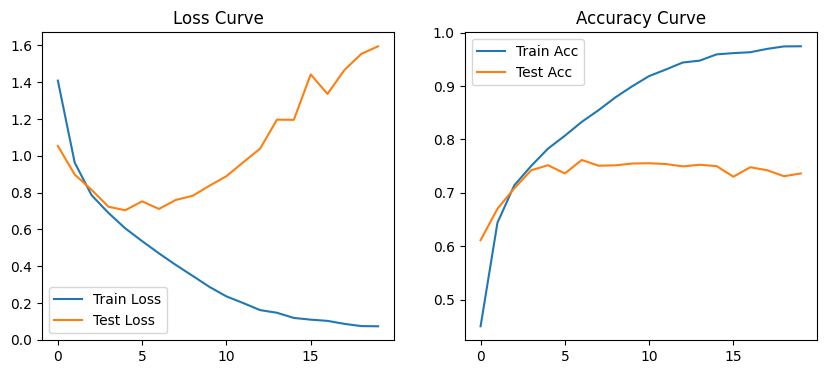

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['test_loss'], label='Test Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1,2,2)
plt.plot(history['train_acc'], label='Train Acc')
plt.plot(history['test_acc'], label='Test Acc')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

/tmp/ipykernel_1764/2213539080.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_simplecnn.pth', map_location=device))


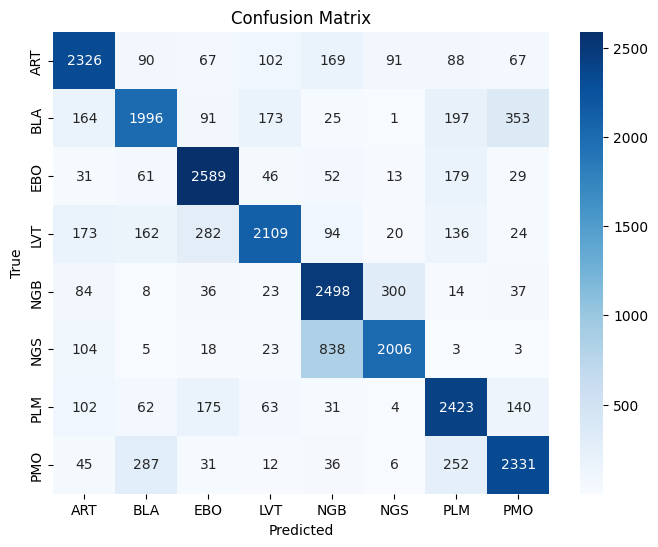


Classification Report:

              precision    recall  f1-score   support

         ART       0.77      0.78      0.77      3000
         BLA       0.75      0.67      0.70      3000
         EBO       0.79      0.86      0.82      3000
         LVT       0.83      0.70      0.76      3000
         NGB       0.67      0.83      0.74      3000
         NGS       0.82      0.67      0.74      3000
         PLM       0.74      0.81      0.77      3000
         PMO       0.78      0.78      0.78      3000

    accuracy                           0.76     24000
   macro avg       0.77      0.76      0.76     24000
weighted avg       0.77      0.76      0.76     24000



In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleCNN(num_classes=8).to(device)
model.load_state_dict(torch.load('best_simplecnn.pth', map_location=device))
class_names = ['ART', 'BLA', 'EBO', 'LVT', 'NGB', 'NGS', 'PLM', 'PMO']
plot_confusion_matrix(model, test_loader, device, class_names)

1.2 Make some improvements

1. add BatchNorm2d

In [1]:
#BatchNorm 2d
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=8):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 7 * 7, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [2]:
import importlib
import functions
importlib.reload(functions)
from functions import *

In [3]:
train_dir = './data/train'
test_dir = './data/test'
batch_size = 64
num_epochs = 20
num_classes = 8
lr=0.001
save_path='best_simplecnn_batch.pth'

train_loader, test_loader = get_data_loaders(train_dir, test_dir, batch_size=batch_size)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleCNN(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
best_acc = 0.0
history = {'train_loss': [], 'train_acc': [], 'test_loss': [], 'test_acc': []}

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    train_loss, train_acc = train_one_epoch(model, optimizer, criterion, train_loader, device)
    test_loss, test_acc = evaluate(model, criterion, test_loader, device)
    print(f"Train Loss: {train_loss:.4f}  Acc: {train_acc:.4f}")
    print(f"Test  Loss: {test_loss:.4f}  Acc: {test_acc:.4f}")

    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['test_loss'].append(test_loss)
    history['test_acc'].append(test_acc)

    if test_acc > best_acc:
        best_acc = test_acc
        torch.save(model.state_dict(), save_path)
        print("Best model saved.")

print(f"Best Test Accuracy: {best_acc:.4f}")



Epoch 1/20


Train Loss: 1.0853  Acc: 0.5982
Test  Loss: 1.0363  Acc: 0.6235
Best model saved.

Epoch 2/20


Train Loss: 0.7742  Acc: 0.7179
Test  Loss: 0.7815  Acc: 0.7167
Best model saved.

Epoch 3/20


Train Loss: 0.6659  Acc: 0.7628
Test  Loss: 0.7052  Acc: 0.7463
Best model saved.

Epoch 4/20


Train Loss: 0.5939  Acc: 0.7899
Test  Loss: 0.7580  Acc: 0.7230

Epoch 5/20


Train Loss: 0.5445  Acc: 0.8063
Test  Loss: 0.8483  Acc: 0.7057

Epoch 6/20


Train Loss: 0.4919  Acc: 0.8247
Test  Loss: 0.6756  Acc: 0.7726
Best model saved.

Epoch 7/20


Train Loss: 0.4497  Acc: 0.8391
Test  Loss: 0.7440  Acc: 0.7447

Epoch 8/20


Train Loss: 0.4068  Acc: 0.8531
Test  Loss: 0.7595  Acc: 0.7525

Epoch 9/20


Train Loss: 0.3587  Acc: 0.8727
Test  Loss: 0.7061  Acc: 0.7638

Epoch 10/20


Train Loss: 0.3174  Acc: 0.8851
Test  Loss: 0.6805  Acc: 0.7825
Best model saved.

Epoch 11/20


Train Loss: 0.2901  Acc: 0.8936
Test  Loss: 0.7859  Acc: 0.7599

Epoch 12/20


Train Loss: 0.2462  Acc: 0.9125
Test  Loss: 0.9050  Acc: 0.7371

Epoch 13/20


Train Loss: 0.2198  Acc: 0.9205
Test  Loss: 0.8163  Acc: 0.7652

Epoch 14/20


Train Loss: 0.1918  Acc: 0.9304
Test  Loss: 0.8838  Acc: 0.7748

Epoch 15/20


Train Loss: 0.1676  Acc: 0.9396
Test  Loss: 0.8397  Acc: 0.7766

Epoch 16/20


Train Loss: 0.1401  Acc: 0.9497
Test  Loss: 0.8967  Acc: 0.7851
Best model saved.

Epoch 17/20


Train Loss: 0.1275  Acc: 0.9542
Test  Loss: 0.9738  Acc: 0.7761

Epoch 18/20


Train Loss: 0.1173  Acc: 0.9571
Test  Loss: 0.9898  Acc: 0.7781

Epoch 19/20


Train Loss: 0.1027  Acc: 0.9643
Test  Loss: 1.1547  Acc: 0.7442

Epoch 20/20


Train Loss: 0.0963  Acc: 0.9663
Test  Loss: 1.2441  Acc: 0.7570
Best Test Accuracy: 0.7851


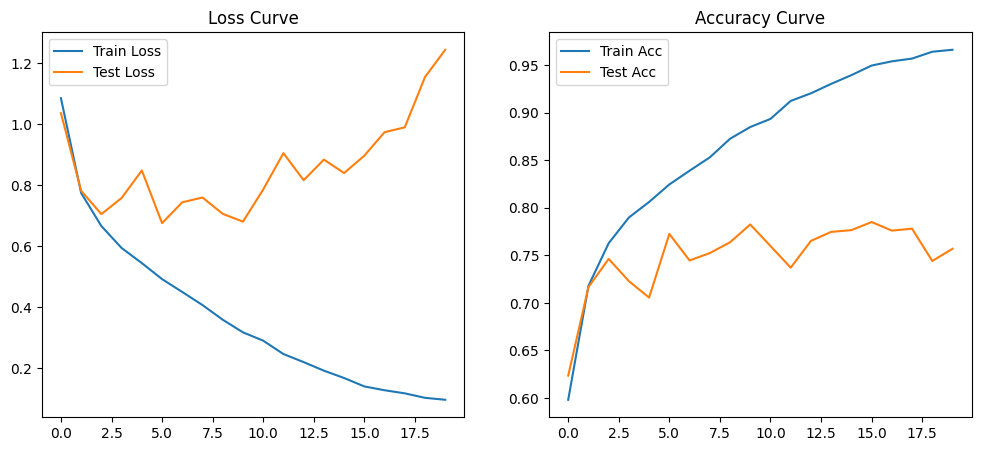

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['test_loss'], label='Test Loss')
plt.legend()
plt.title('Loss Curve')
plt.subplot(1,2,2)
plt.plot(history['train_acc'], label='Train Acc')
plt.plot(history['test_acc'], label='Test Acc')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

/tmp/ipykernel_28260/2800521231.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_simplecnn_batch.pth', map_location=device))


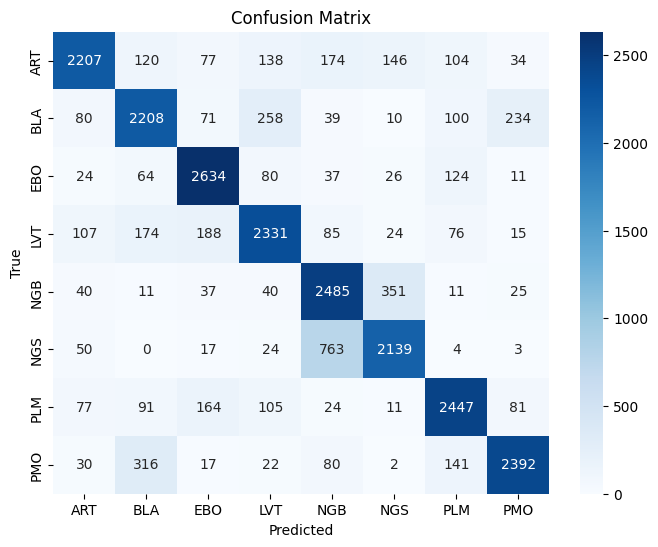


Classification Report:

              precision    recall  f1-score   support

         ART       0.84      0.74      0.79      3000
         BLA       0.74      0.74      0.74      3000
         EBO       0.82      0.88      0.85      3000
         LVT       0.78      0.78      0.78      3000
         NGB       0.67      0.83      0.74      3000
         NGS       0.79      0.71      0.75      3000
         PLM       0.81      0.82      0.81      3000
         PMO       0.86      0.80      0.83      3000

    accuracy                           0.79     24000
   macro avg       0.79      0.79      0.79     24000
weighted avg       0.79      0.79      0.79     24000



In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleCNN(num_classes=8).to(device)
model.load_state_dict(torch.load('best_simplecnn_batch.pth', map_location=device))
class_names = ['ART', 'BLA', 'EBO', 'LVT', 'NGB', 'NGS', 'PLM', 'PMO']
plot_confusion_matrix(model, test_loader, device, class_names)

2. Batch 2d + data augmentation: Use rotations, flipping, cropping, or any other methods to create
additional training images from the data you already have.

In [6]:
#batch 2d + data augmentation
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=8):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 7 * 7, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x



In [7]:
train_dir = './data/train'
test_dir = './data/test'
batch_size = 64
num_epochs = 20
num_classes = 8
lr=0.001
save_path='best_simplecnn_dataaug.pth'

train_loader, test_loader = get_data_loaders_data_arg(train_dir, test_dir, batch_size=batch_size)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleCNN(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
best_acc = 0.0
history = {'train_loss': [], 'train_acc': [], 'test_loss': [], 'test_acc': []}

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    train_loss, train_acc = train_one_epoch(model, optimizer, criterion, train_loader, device)
    test_loss, test_acc = evaluate(model, criterion, test_loader, device)
    print(f"Train Loss: {train_loss:.4f}  Acc: {train_acc:.4f}")
    print(f"Test  Loss: {test_loss:.4f}  Acc: {test_acc:.4f}")

    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['test_loss'].append(test_loss)
    history['test_acc'].append(test_acc)

    if test_acc > best_acc:
        best_acc = test_acc
        torch.save(model.state_dict(), save_path)
        print("Best model saved.")

print(f"Best Test Accuracy: {best_acc:.4f}")


Epoch 1/20


Train Loss: 1.1075  Acc: 0.5887
Test  Loss: 0.8845  Acc: 0.6835
Best model saved.

Epoch 2/20


Train Loss: 0.8055  Acc: 0.7072
Test  Loss: 0.8729  Acc: 0.6783

Epoch 3/20


Train Loss: 0.7451  Acc: 0.7311
Test  Loss: 1.0581  Acc: 0.6211

Epoch 4/20


Train Loss: 0.6907  Acc: 0.7498
Test  Loss: 0.7612  Acc: 0.7290
Best model saved.

Epoch 5/20


Train Loss: 0.6380  Acc: 0.7707
Test  Loss: 0.6454  Acc: 0.7687
Best model saved.

Epoch 6/20


Train Loss: 0.6140  Acc: 0.7800
Test  Loss: 0.6452  Acc: 0.7714
Best model saved.

Epoch 7/20


Train Loss: 0.5847  Acc: 0.7928
Test  Loss: 0.6086  Acc: 0.7869
Best model saved.

Epoch 8/20


Train Loss: 0.5682  Acc: 0.7982
Test  Loss: 0.7412  Acc: 0.7388

Epoch 9/20


Train Loss: 0.5446  Acc: 0.8069
Test  Loss: 0.6122  Acc: 0.7843

Epoch 10/20


Train Loss: 0.5293  Acc: 0.8096
Test  Loss: 0.6988  Acc: 0.7556

Epoch 11/20


Train Loss: 0.5086  Acc: 0.8179
Test  Loss: 0.5880  Acc: 0.7961
Best model saved.

Epoch 12/20


Train Loss: 0.4990  Acc: 0.8221
Test  Loss: 0.5410  Acc: 0.8126
Best model saved.

Epoch 13/20


Train Loss: 0.4790  Acc: 0.8303
Test  Loss: 0.6073  Acc: 0.7959

Epoch 14/20


Train Loss: 0.4696  Acc: 0.8353
Test  Loss: 0.6107  Acc: 0.7862

Epoch 15/20


Train Loss: 0.4543  Acc: 0.8384
Test  Loss: 0.5449  Acc: 0.8105

Epoch 16/20


Train Loss: 0.4405  Acc: 0.8432
Test  Loss: 0.5807  Acc: 0.7993

Epoch 17/20


Train Loss: 0.4330  Acc: 0.8459
Test  Loss: 0.5712  Acc: 0.8047

Epoch 18/20


Train Loss: 0.4172  Acc: 0.8500
Test  Loss: 0.5494  Acc: 0.8123

Epoch 19/20


Train Loss: 0.4077  Acc: 0.8543
Test  Loss: 0.5753  Acc: 0.8070

Epoch 20/20


Train Loss: 0.3912  Acc: 0.8595
Test  Loss: 0.5776  Acc: 0.8070
Best Test Accuracy: 0.8126


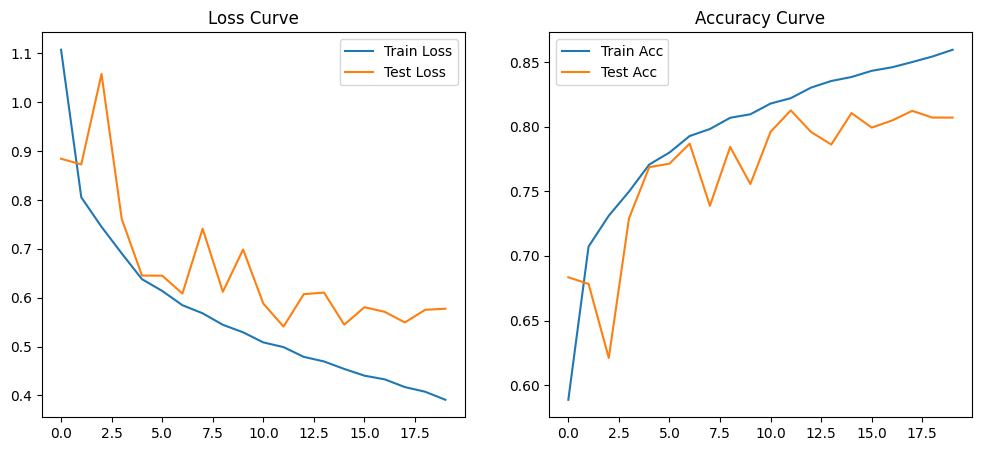

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['test_loss'], label='Test Loss')
plt.legend()
plt.title('Loss Curve')
plt.subplot(1,2,2)
plt.plot(history['train_acc'], label='Train Acc')
plt.plot(history['test_acc'], label='Test Acc')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

/tmp/ipykernel_28260/1566509014.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_simplecnn_dataaug.pth', map_location=device))


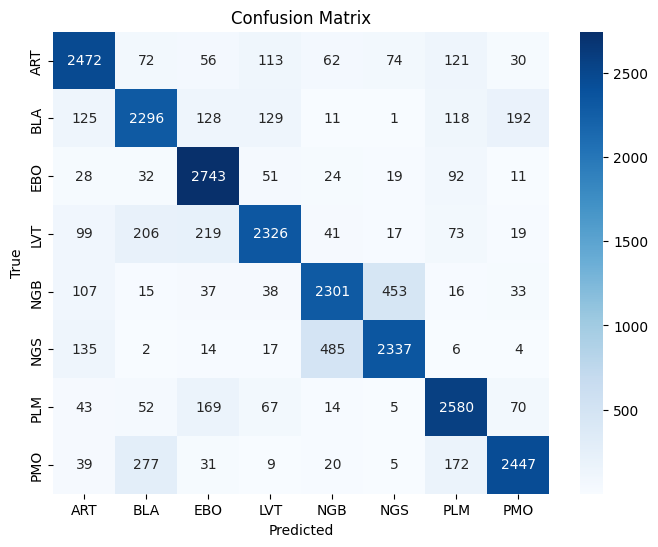


Classification Report:

              precision    recall  f1-score   support

         ART       0.81      0.82      0.82      3000
         BLA       0.78      0.77      0.77      3000
         EBO       0.81      0.91      0.86      3000
         LVT       0.85      0.78      0.81      3000
         NGB       0.78      0.77      0.77      3000
         NGS       0.80      0.78      0.79      3000
         PLM       0.81      0.86      0.84      3000
         PMO       0.87      0.82      0.84      3000

    accuracy                           0.81     24000
   macro avg       0.81      0.81      0.81     24000
weighted avg       0.81      0.81      0.81     24000



In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleCNN(num_classes=8).to(device)
model.load_state_dict(torch.load('best_simplecnn_dataaug.pth', map_location=device))
class_names = ['ART', 'BLA', 'EBO', 'LVT', 'NGB', 'NGS', 'PLM', 'PMO']
plot_confusion_matrix(model, test_loader, device, class_names)

3. BatchNormal2D+ Optimisers and Activation Functions: The choice of optimisers, activation functions,
and their hyper-parameters is crucial for training. While Adam and ReLU are often solid
options, it can pay to try others.

In [10]:
#batch 2d + optim
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=8, negative_slope=0.01):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 7 * 7, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, num_classes)
        # 保存负斜率参数，用于 Leaky ReLU
        self.negative_slope = negative_slope

    def forward(self, x):
        # 使用 F.leaky_relu 替换所有的 F.relu
        x = self.pool(F.leaky_relu(self.bn1(self.conv1(x)), negative_slope=self.negative_slope))
        x = self.pool(F.leaky_relu(self.bn2(self.conv2(x)), negative_slope=self.negative_slope))
        x = self.pool(F.leaky_relu(self.bn3(self.conv3(x)), negative_slope=self.negative_slope))
        x = x.view(x.size(0), -1)
        x = F.leaky_relu(self.fc1(x), negative_slope=self.negative_slope)
        x = F.leaky_relu(self.fc2(x), negative_slope=self.negative_slope)
        x = self.fc3(x)
        return x



In [11]:
train_dir = './data/train'
test_dir = './data/test'
batch_size = 64
num_epochs = 20
num_classes = 8
lr=0.001
save_path='best_simplecnn_batch2d_optim.pth'
# 3. 获取数据
train_loader, test_loader = get_data_loaders(train_dir, test_dir, batch_size=batch_size)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleCNN(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
best_acc = 0.0
history = {'train_loss': [], 'train_acc': [], 'test_loss': [], 'test_acc': []}

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    train_loss, train_acc = train_one_epoch(model, optimizer, criterion, train_loader, device)
    test_loss, test_acc = evaluate(model, criterion, test_loader, device)
    print(f"Train Loss: {train_loss:.4f}  Acc: {train_acc:.4f}")
    print(f"Test  Loss: {test_loss:.4f}  Acc: {test_acc:.4f}")

    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['test_loss'].append(test_loss)
    history['test_acc'].append(test_acc)

    if test_acc > best_acc:
        best_acc = test_acc
        torch.save(model.state_dict(), save_path)
        print("Best model saved.")
    scheduler.step()
print(f"Best Test Accuracy: {best_acc:.4f}")



Epoch 1/20


Train Loss: 1.0893  Acc: 0.5953
Test  Loss: 1.0561  Acc: 0.6157
Best model saved.

Epoch 2/20


Train Loss: 0.7882  Acc: 0.7143
Test  Loss: 0.8275  Acc: 0.6985
Best model saved.

Epoch 3/20


Train Loss: 0.6773  Acc: 0.7543
Test  Loss: 0.7272  Acc: 0.7461
Best model saved.

Epoch 4/20


Train Loss: 0.6001  Acc: 0.7846
Test  Loss: 0.6617  Acc: 0.7655
Best model saved.

Epoch 5/20


Train Loss: 0.5427  Acc: 0.8067
Test  Loss: 0.6671  Acc: 0.7674
Best model saved.

Epoch 6/20


Train Loss: 0.4905  Acc: 0.8264
Test  Loss: 0.7827  Acc: 0.7377

Epoch 7/20


Train Loss: 0.4440  Acc: 0.8401
Test  Loss: 0.6939  Acc: 0.7597

Epoch 8/20


Train Loss: 0.2878  Acc: 0.9018
Test  Loss: 0.5606  Acc: 0.8156
Best model saved.

Epoch 9/20


Train Loss: 0.2535  Acc: 0.9143
Test  Loss: 0.5718  Acc: 0.8148

Epoch 10/20


Train Loss: 0.2327  Acc: 0.9221
Test  Loss: 0.5767  Acc: 0.8134

Epoch 11/20


Train Loss: 0.2130  Acc: 0.9304
Test  Loss: 0.5939  Acc: 0.8127

Epoch 12/20


Train Loss: 0.1993  Acc: 0.9348
Test  Loss: 0.6131  Acc: 0.8106

Epoch 13/20


Train Loss: 0.1807  Acc: 0.9408
Test  Loss: 0.6279  Acc: 0.8083

Epoch 14/20


Train Loss: 0.1638  Acc: 0.9487
Test  Loss: 0.6373  Acc: 0.8086

Epoch 15/20


Train Loss: 0.1372  Acc: 0.9608
Test  Loss: 0.6415  Acc: 0.8096

Epoch 16/20


Train Loss: 0.1323  Acc: 0.9626
Test  Loss: 0.6508  Acc: 0.8092

Epoch 17/20


Train Loss: 0.1303  Acc: 0.9633
Test  Loss: 0.6537  Acc: 0.8087

Epoch 18/20


Train Loss: 0.1276  Acc: 0.9633
Test  Loss: 0.6589  Acc: 0.8086

Epoch 19/20


Train Loss: 0.1271  Acc: 0.9634
Test  Loss: 0.6625  Acc: 0.8085

Epoch 20/20


Train Loss: 0.1258  Acc: 0.9647
Test  Loss: 0.6609  Acc: 0.8088
Best Test Accuracy: 0.8156


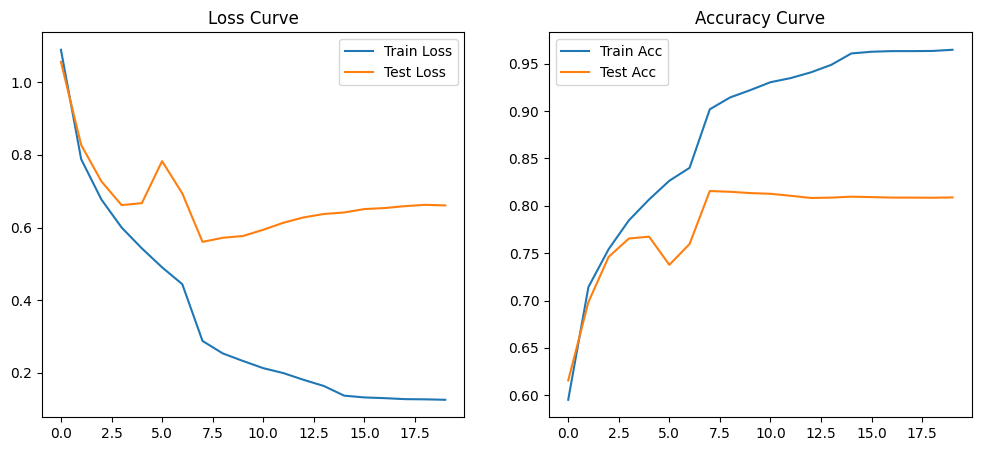

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['test_loss'], label='Test Loss')
plt.legend()
plt.title('Loss Curve')
plt.subplot(1,2,2)
plt.plot(history['train_acc'], label='Train Acc')
plt.plot(history['test_acc'], label='Test Acc')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

/tmp/ipykernel_28260/1475684240.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_simplecnn_batch2d_optim.pth', map_location=device)

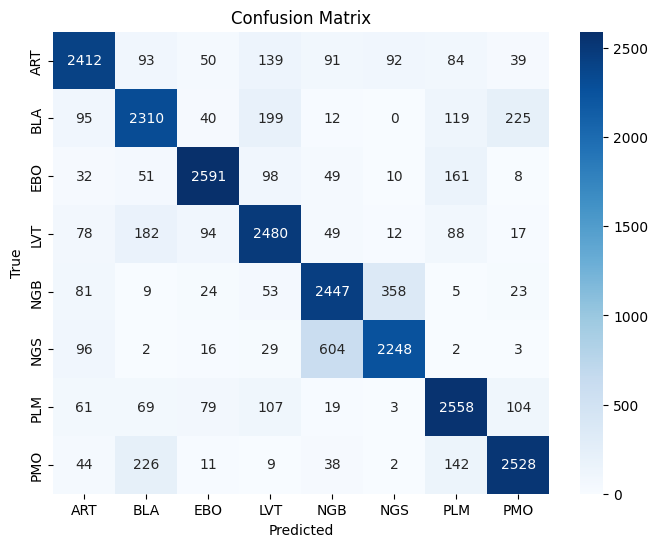


Classification Report:

              precision    recall  f1-score   support

         ART       0.83      0.80      0.82      3000
         BLA       0.79      0.77      0.78      3000
         EBO       0.89      0.86      0.88      3000
         LVT       0.80      0.83      0.81      3000
         NGB       0.74      0.82      0.78      3000
         NGS       0.82      0.75      0.79      3000
         PLM       0.81      0.85      0.83      3000
         PMO       0.86      0.84      0.85      3000

    accuracy                           0.82     24000
   macro avg       0.82      0.82      0.82     24000
weighted avg       0.82      0.82      0.82     24000



In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleCNN(num_classes=8).to(device)
model.load_state_dict(torch.load('best_simplecnn_batch2d_optim.pth', map_location=device))
class_names = ['ART', 'BLA', 'EBO', 'LVT', 'NGB', 'NGS', 'PLM', 'PMO']
plot_confusion_matrix(model, test_loader, device, class_names)

4. BatchNormal2D + Early stopping: Use a validation set split from the training data to decide when to stop
training. The method cvpartition may come in handy for doing this in a stratified way.

In [14]:
#batch 2d + early stoop
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=8):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 7 * 7, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x



In [15]:
train_dir = './data/train'
test_dir = './data/test'
batch_size = 64
num_epochs = 20
num_classes = 8
lr = 0.001
save_path = 'best_simplecnnbatch2dearlystoop.pth'
patience = 5  # Early stopping patience
val_ratio = 0.2

train_loader, val_loader, test_loader, class_names = get_data_loaders_eal(
    train_dir, test_dir, batch_size=batch_size, val_ratio=val_ratio
)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleCNN(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

best_acc = 0.0
best_epoch = 0
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': [], 'test_loss': [], 'test_acc': []}
early_stop_counter = 0

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    train_loss, train_acc = train_one_epoch(model, optimizer, criterion, train_loader, device)
    val_loss, val_acc = evaluate(model, criterion, val_loader, device)
    print(f"Train Loss: {train_loss:.4f}  Acc: {train_acc:.4f}")
    print(f"Val   Loss: {val_loss:.4f}  Acc: {val_acc:.4f}")

    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)

    if val_acc > best_acc:
        best_acc = val_acc
        best_epoch = epoch
        torch.save(model.state_dict(), save_path)
        print("Best model saved.")
        early_stop_counter = 0
    else:
        early_stop_counter += 1
        print(f"No improvement for {early_stop_counter} epochs.")
        if early_stop_counter >= patience:
            print("Early stopping triggered.")
            break
    scheduler.step()

print(f"Best Validation Accuracy: {best_acc:.4f} at epoch {best_epoch+1}")





Epoch 1/20


Train Loss: 1.2044  Acc: 0.5465
Val   Loss: 1.0094  Acc: 0.6239
Best model saved.

Epoch 2/20


Train Loss: 0.8848  Acc: 0.6745
Val   Loss: 1.2926  Acc: 0.5673
No improvement for 1 epochs.

Epoch 3/20


Train Loss: 0.7863  Acc: 0.7161
Val   Loss: 0.7855  Acc: 0.7191
Best model saved.

Epoch 4/20


Train Loss: 0.7364  Acc: 0.7341
Val   Loss: 1.1739  Acc: 0.6112
No improvement for 1 epochs.

Epoch 5/20


Train Loss: 0.6801  Acc: 0.7536
Val   Loss: 0.8188  Acc: 0.7144
No improvement for 2 epochs.

Epoch 6/20


Train Loss: 0.6547  Acc: 0.7657
Val   Loss: 0.7025  Acc: 0.7605
Best model saved.

Epoch 7/20


Train Loss: 0.6267  Acc: 0.7762
Val   Loss: 0.6391  Acc: 0.7766
Best model saved.

Epoch 8/20


Train Loss: 0.5211  Acc: 0.8156
Val   Loss: 0.5649  Acc: 0.7997
Best model saved.

Epoch 9/20


Train Loss: 0.5044  Acc: 0.8210
Val   Loss: 0.5383  Acc: 0.8147
Best model saved.

Epoch 10/20


Train Loss: 0.4925  Acc: 0.8240
Val   Loss: 0.5429  Acc: 0.8102
No improvement for 1 epochs.

Epoch 11/20


Train Loss: 0.4847  Acc: 0.8266
Val   Loss: 0.5383  Acc: 0.8153
Best model saved.

Epoch 12/20


Train Loss: 0.4795  Acc: 0.8293
Val   Loss: 0.5354  Acc: 0.8133
No improvement for 1 epochs.

Epoch 13/20


Train Loss: 0.4735  Acc: 0.8340
Val   Loss: 0.5284  Acc: 0.8161
Best model saved.

Epoch 14/20


Train Loss: 0.4644  Acc: 0.8355
Val   Loss: 0.5336  Acc: 0.8127
No improvement for 1 epochs.

Epoch 15/20


Train Loss: 0.4491  Acc: 0.8398
Val   Loss: 0.5306  Acc: 0.8137
No improvement for 2 epochs.

Epoch 16/20


Train Loss: 0.4469  Acc: 0.8421
Val   Loss: 0.5235  Acc: 0.8187
Best model saved.

Epoch 17/20


Train Loss: 0.4428  Acc: 0.8436
Val   Loss: 0.5285  Acc: 0.8145
No improvement for 1 epochs.

Epoch 18/20


Train Loss: 0.4425  Acc: 0.8421
Val   Loss: 0.5256  Acc: 0.8180
No improvement for 2 epochs.

Epoch 19/20


Train Loss: 0.4446  Acc: 0.8426
Val   Loss: 0.5267  Acc: 0.8141
No improvement for 3 epochs.

Epoch 20/20


Train Loss: 0.4420  Acc: 0.8426
Val   Loss: 0.5204  Acc: 0.8175
No improvement for 4 epochs.
Best Validation Accuracy: 0.8187 at epoch 16


/tmp/ipykernel_28260/1747664580.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(save_path))
                                            

Test  Loss: 0.5329  Acc: 0.8143


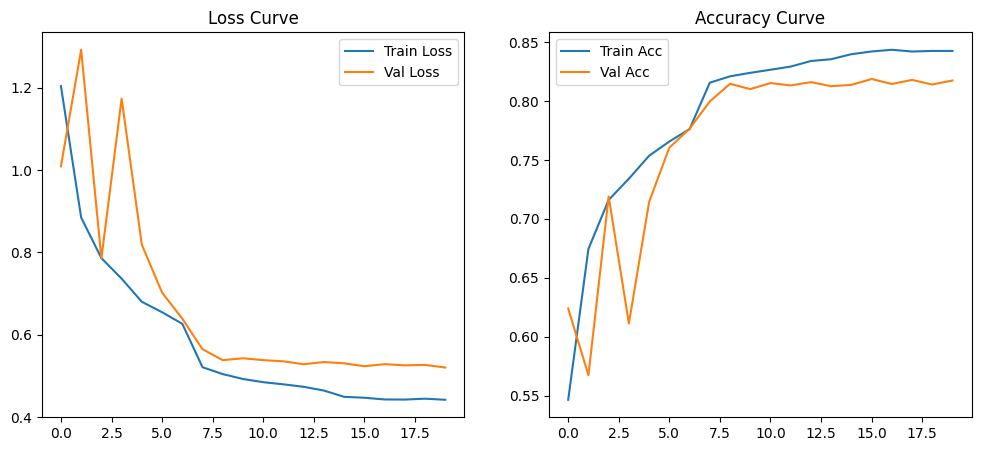

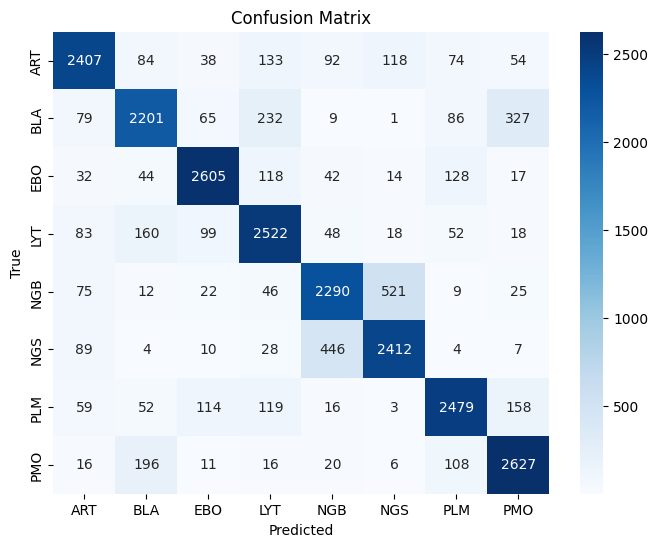


Classification Report:

              precision    recall  f1-score   support

         ART       0.85      0.80      0.82      3000
         BLA       0.80      0.73      0.77      3000
         EBO       0.88      0.87      0.87      3000
         LYT       0.78      0.84      0.81      3000
         NGB       0.77      0.76      0.77      3000
         NGS       0.78      0.80      0.79      3000
         PLM       0.84      0.83      0.83      3000
         PMO       0.81      0.88      0.84      3000

    accuracy                           0.81     24000
   macro avg       0.81      0.81      0.81     24000
weighted avg       0.81      0.81      0.81     24000



In [16]:
model.load_state_dict(torch.load(save_path))
test_loss, test_acc = evaluate(model, criterion, test_loader, device)
print(f"Test  Loss: {test_loss:.4f}  Acc: {test_acc:.4f}")

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Curve')
plt.subplot(1,2,2)
plt.plot(history['train_acc'], label='Train Acc')
plt.plot(history['val_acc'], label='Val Acc')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

plot_confusion_matrix(model, test_loader, device, class_names)

/tmp/ipykernel_28260/1440892852.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_simplecnnbatch2dearlystoop.pth', map_location=devi

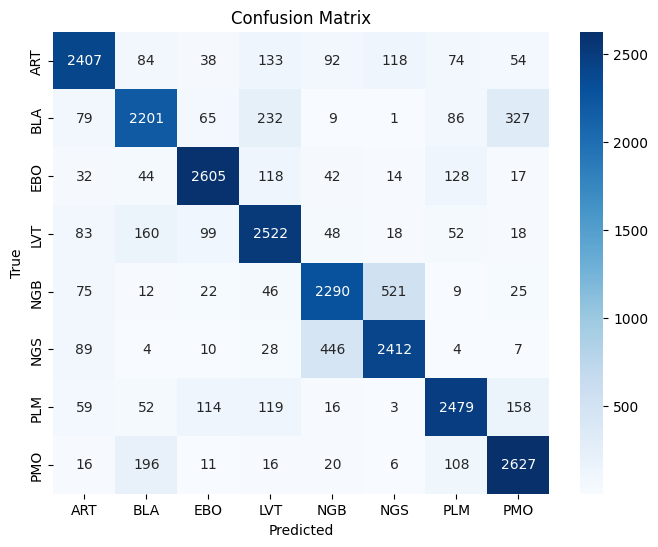


Classification Report:

              precision    recall  f1-score   support

         ART       0.85      0.80      0.82      3000
         BLA       0.80      0.73      0.77      3000
         EBO       0.88      0.87      0.87      3000
         LVT       0.78      0.84      0.81      3000
         NGB       0.77      0.76      0.77      3000
         NGS       0.78      0.80      0.79      3000
         PLM       0.84      0.83      0.83      3000
         PMO       0.81      0.88      0.84      3000

    accuracy                           0.81     24000
   macro avg       0.81      0.81      0.81     24000
weighted avg       0.81      0.81      0.81     24000



In [17]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleCNN(num_classes=8).to(device)
model.load_state_dict(torch.load('best_simplecnnbatch2dearlystoop.pth', map_location=device))
class_names = ['ART', 'BLA', 'EBO', 'LVT', 'NGB', 'NGS', 'PLM', 'PMO']
plot_confusion_matrix(model, test_loader, device, class_names)

5. batch 2D + data augment + Optimisers(AdamW+leck RU)


Epoch 1/20


Train Loss: 1.1434  Acc: 0.5693
Test  Loss: 0.9096  Acc: 0.6671
Best model saved.

Epoch 2/20


Train Loss: 0.8315  Acc: 0.7001
Test  Loss: 0.8351  Acc: 0.6974
Best model saved.

Epoch 3/20


Train Loss: 0.7442  Acc: 0.7325
Test  Loss: 0.7667  Acc: 0.7332
Best model saved.

Epoch 4/20


Train Loss: 0.6862  Acc: 0.7535
Test  Loss: 0.7672  Acc: 0.7212

Epoch 5/20


Train Loss: 0.6503  Acc: 0.7682
Test  Loss: 0.8238  Acc: 0.7138

Epoch 6/20


Train Loss: 0.6191  Acc: 0.7775
Test  Loss: 0.6771  Acc: 0.7610
Best model saved.

Epoch 7/20


Train Loss: 0.5878  Acc: 0.7903
Test  Loss: 0.6168  Acc: 0.7853
Best model saved.

Epoch 8/20


Train Loss: 0.4833  Acc: 0.8299
Test  Loss: 0.5313  Acc: 0.8153
Best model saved.

Epoch 9/20


Train Loss: 0.4652  Acc: 0.8339
Test  Loss: 0.5204  Acc: 0.8190
Best model saved.

Epoch 10/20


Train Loss: 0.4566  Acc: 0.8380
Test  Loss: 0.5153  Acc: 0.8216
Best model saved.

Epoch 11/20


Train Loss: 0.4477  Acc: 0.8415
Test  Loss: 0.5125  Acc: 0.8228
Best model saved.

Epoch 12/20


Train Loss: 0.4388  Acc: 0.8438
Test  Loss: 0.5089  Acc: 0.8235
Best model saved.

Epoch 13/20


Train Loss: 0.4310  Acc: 0.8488
Test  Loss: 0.5067  Acc: 0.8257
Best model saved.

Epoch 14/20


Train Loss: 0.4221  Acc: 0.8502
Test  Loss: 0.5121  Acc: 0.8224

Epoch 15/20


Train Loss: 0.4066  Acc: 0.8540
Test  Loss: 0.4994  Acc: 0.8267
Best model saved.

Epoch 16/20


Train Loss: 0.4073  Acc: 0.8565
Test  Loss: 0.4958  Acc: 0.8286
Best model saved.

Epoch 17/20


Train Loss: 0.4027  Acc: 0.8575
Test  Loss: 0.4959  Acc: 0.8297
Best model saved.

Epoch 18/20


Train Loss: 0.4023  Acc: 0.8579
Test  Loss: 0.4937  Acc: 0.8286

Epoch 19/20


Train Loss: 0.4019  Acc: 0.8578
Test  Loss: 0.4943  Acc: 0.8287

Epoch 20/20


Train Loss: 0.3998  Acc: 0.8590
Test  Loss: 0.4933  Acc: 0.8299
Best model saved.
Best Test Accuracy: 0.8299


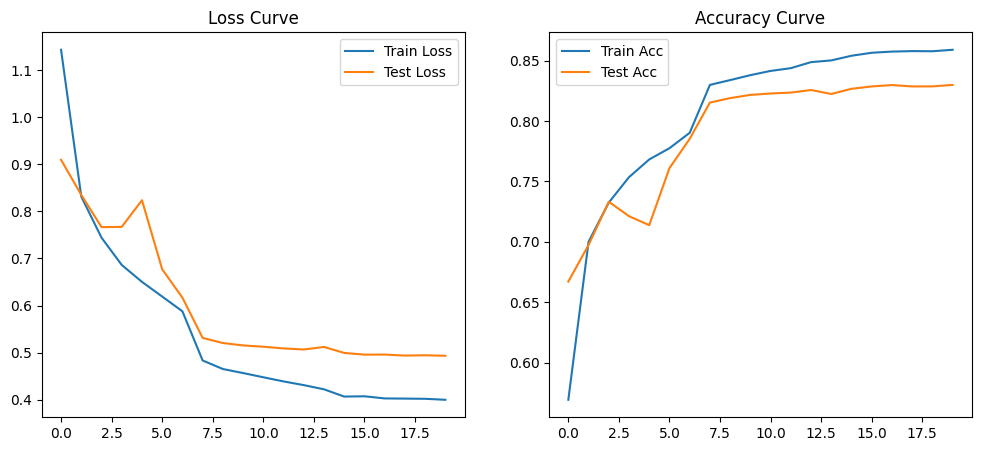

In [28]:
#batch 2D + data augment + Optimisers(AdamW+leck RU)
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=8, negative_slope=0.01):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 7 * 7, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, num_classes)
        self.negative_slope = negative_slope

    def forward(self, x):
        x = self.pool(F.leaky_relu(self.bn1(self.conv1(x)), negative_slope=self.negative_slope))
        x = self.pool(F.leaky_relu(self.bn2(self.conv2(x)), negative_slope=self.negative_slope))
        x = self.pool(F.leaky_relu(self.bn3(self.conv3(x)), negative_slope=self.negative_slope))
        x = x.view(x.size(0), -1)
        x = F.leaky_relu(self.fc1(x), negative_slope=self.negative_slope)
        x = F.leaky_relu(self.fc2(x), negative_slope=self.negative_slope)
        x = self.fc3(x)
        return x

train_dir = './data/train'
test_dir = './data/test'
batch_size = 64
num_epochs = 20
num_classes = 8
lr=0.001
save_path='best_simplecnnbatch2DdataaugmentOptimisers1.pth'

train_loader, test_loader = get_data_loaders_data_arg(train_dir, test_dir, batch_size=batch_size)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleCNN(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
best_acc = 0.0
history = {'train_loss': [], 'train_acc': [], 'test_loss': [], 'test_acc': []}

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    train_loss, train_acc = train_one_epoch(model, optimizer, criterion, train_loader, device)
    test_loss, test_acc = evaluate(model, criterion, test_loader, device)
    print(f"Train Loss: {train_loss:.4f}  Acc: {train_acc:.4f}")
    print(f"Test  Loss: {test_loss:.4f}  Acc: {test_acc:.4f}")

    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['test_loss'].append(test_loss)
    history['test_acc'].append(test_acc)

    if test_acc > best_acc:
        best_acc = test_acc
        torch.save(model.state_dict(), save_path)
        print("Best model saved.")
    scheduler.step()
print(f"Best Test Accuracy: {best_acc:.4f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['test_loss'], label='Test Loss')
plt.legend()
plt.title('Loss Curve')
plt.subplot(1,2,2)
plt.plot(history['train_acc'], label='Train Acc')
plt.plot(history['test_acc'], label='Test Acc')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

/tmp/ipykernel_28260/2946887993.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_simplecnnbatch2DdataaugmentOptimisers.pth', map_lo

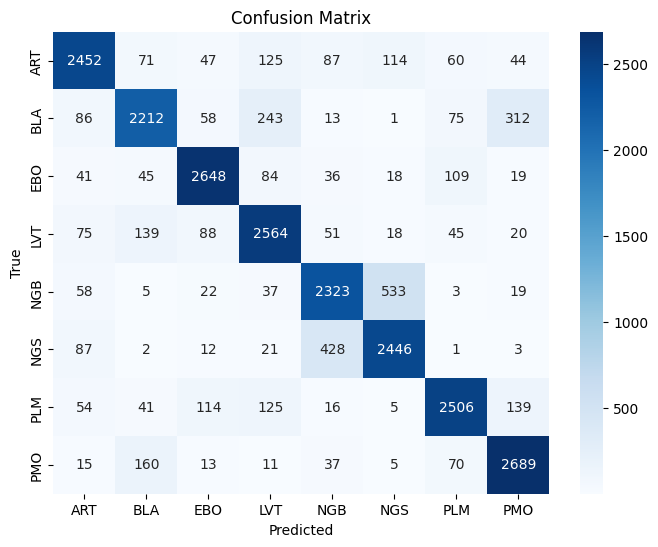


Classification Report:

              precision    recall  f1-score   support

         ART       0.85      0.82      0.84      3000
         BLA       0.83      0.74      0.78      3000
         EBO       0.88      0.88      0.88      3000
         LVT       0.80      0.85      0.83      3000
         NGB       0.78      0.77      0.78      3000
         NGS       0.78      0.82      0.80      3000
         PLM       0.87      0.84      0.85      3000
         PMO       0.83      0.90      0.86      3000

    accuracy                           0.83     24000
   macro avg       0.83      0.83      0.83     24000
weighted avg       0.83      0.83      0.83     24000



In [19]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleCNN(num_classes=8).to(device)
model.load_state_dict(torch.load('best_simplecnnbatch2DdataaugmentOptimisers.pth', map_location=device))
class_names = ['ART', 'BLA', 'EBO', 'LVT', 'NGB', 'NGS', 'PLM', 'PMO']
plot_confusion_matrix(model, test_loader, device, class_names)

6. batch 2D + data augment + Optimisers(AdamW+leck RU)+early stopping

In [ ]:
#batch 2D + data augment + Optimisers(AdamW+leck RU)+early stopping

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=8, negative_slope=0.01):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 7 * 7, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, num_classes)
        self.negative_slope = negative_slope

    def forward(self, x):
        x = self.pool(F.leaky_relu(self.bn1(self.conv1(x)), negative_slope=self.negative_slope))
        x = self.pool(F.leaky_relu(self.bn2(self.conv2(x)), negative_slope=self.negative_slope))
        x = self.pool(F.leaky_relu(self.bn3(self.conv3(x)), negative_slope=self.negative_slope))
        x = x.view(x.size(0), -1)
        x = F.leaky_relu(self.fc1(x), negative_slope=self.negative_slope)
        x = F.leaky_relu(self.fc2(x), negative_slope=self.negative_slope)
        x = self.fc3(x)
        return x

# 主流程
train_dir = './data/train'
test_dir = './data/test'
batch_size = 64
num_epochs = 20
num_classes = 8
lr = 0.001
save_path = 'best_simplecnnall.pth'
patience = 5  # Early stopping patience
val_ratio = 0.2

train_loader, val_loader, test_loader, class_names = get_data_loaders_eal(
    train_dir, test_dir, batch_size=batch_size, val_ratio=val_ratio
)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleCNN(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

best_acc = 0.0
best_epoch = 0
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': [], 'test_loss': [], 'test_acc': []}
early_stop_counter = 0

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    train_loss, train_acc = train_one_epoch(model, optimizer, criterion, train_loader, device)
    val_loss, val_acc = evaluate(model, criterion, val_loader, device)
    print(f"Train Loss: {train_loss:.4f}  Acc: {train_acc:.4f}")
    print(f"Val   Loss: {val_loss:.4f}  Acc: {val_acc:.4f}")

    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)

    if val_acc > best_acc:
        best_acc = val_acc
        best_epoch = epoch
        torch.save(model.state_dict(), save_path)
        print("Best model saved.")
        early_stop_counter = 0
    else:
        early_stop_counter += 1
        print(f"No improvement for {early_stop_counter} epochs.")
        if early_stop_counter >= patience:
            print("Early stopping triggered.")
            break
    scheduler.step()

print(f"Best Validation Accuracy: {best_acc:.4f} at epoch {best_epoch+1}")

model.load_state_dict(torch.load(save_path))
test_loss, test_acc = evaluate(model, criterion, test_loader, device)
print(f"Test  Loss: {test_loss:.4f}  Acc: {test_acc:.4f}")

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Curve')
plt.subplot(1,2,2)
plt.plot(history['train_acc'], label='Train Acc')
plt.plot(history['val_acc'], label='Val Acc')
plt.legend()
plt.title('Accuracy Curve')
plt.show()


plot_confusion_matrix(model, test_loader, device, class_names)


Epoch 1/20


Train Loss: 1.1564  Acc: 0.5580
Val   Loss: 0.9854  Acc: 0.6209
Best model saved.

Epoch 2/20


Train Loss: 0.8488  Acc: 0.6867
Val   Loss: 0.8774  Acc: 0.6797
Best model saved.

Epoch 3/20


Train Loss: 0.7718  Acc: 0.7213
Val   Loss: 0.7203  Acc: 0.7448
Best model saved.

Epoch 4/20


Train:  67%|██████▋   | 267/400 [00:02<00:01, 104.97it/s]

7. Data augmentaion + optimse


Epoch 1/20


Train Loss: 1.3562  Acc: 0.4714
Test  Loss: 1.1057  Acc: 0.5883
Best model saved.

Epoch 2/20


Train Loss: 0.9154  Acc: 0.6637
Test  Loss: 0.8144  Acc: 0.7027
Best model saved.

Epoch 3/20


Train Loss: 0.7732  Acc: 0.7198
Test  Loss: 0.7885  Acc: 0.7170
Best model saved.

Epoch 4/20


Train Loss: 0.7021  Acc: 0.7476
Test  Loss: 0.7309  Acc: 0.7412
Best model saved.

Epoch 5/20


Train Loss: 0.6456  Acc: 0.7692
Test  Loss: 0.7911  Acc: 0.7147

Epoch 6/20


Train Loss: 0.6042  Acc: 0.7835
Test  Loss: 0.6277  Acc: 0.7792
Best model saved.

Epoch 7/20


Train Loss: 0.5720  Acc: 0.7964
Test  Loss: 0.6655  Acc: 0.7626

Epoch 8/20


Train Loss: 0.4679  Acc: 0.8337
Test  Loss: 0.5545  Acc: 0.8046
Best model saved.

Epoch 9/20


Train Loss: 0.4469  Acc: 0.8419
Test  Loss: 0.5519  Acc: 0.8063
Best model saved.

Epoch 10/20


Train Loss: 0.4358  Acc: 0.8476
Test  Loss: 0.5568  Acc: 0.8041

Epoch 11/20


Train Loss: 0.4236  Acc: 0.8518
Test  Loss: 0.5493  Acc: 0.8077
Best model saved.

Epoch 12/20


Train Loss: 0.4146  Acc: 0.8558
Test  Loss: 0.5491  Acc: 0.8110
Best model saved.

Epoch 13/20


Train Loss: 0.4076  Acc: 0.8585
Test  Loss: 0.5597  Acc: 0.8064

Epoch 14/20


Train Loss: 0.3982  Acc: 0.8601
Test  Loss: 0.5554  Acc: 0.8093

Epoch 15/20


Train Loss: 0.3838  Acc: 0.8674
Test  Loss: 0.5459  Acc: 0.8126
Best model saved.

Epoch 16/20


Train Loss: 0.3819  Acc: 0.8677
Test  Loss: 0.5432  Acc: 0.8143
Best model saved.

Epoch 17/20


Train Loss: 0.3777  Acc: 0.8688
Test  Loss: 0.5423  Acc: 0.8144
Best model saved.

Epoch 18/20


Train Loss: 0.3785  Acc: 0.8678
Test  Loss: 0.5445  Acc: 0.8129

Epoch 19/20


Train Loss: 0.3777  Acc: 0.8674
Test  Loss: 0.5450  Acc: 0.8134

Epoch 20/20


Train Loss: 0.3772  Acc: 0.8688
Test  Loss: 0.5422  Acc: 0.8154
Best model saved.
Best Test Accuracy: 0.8154


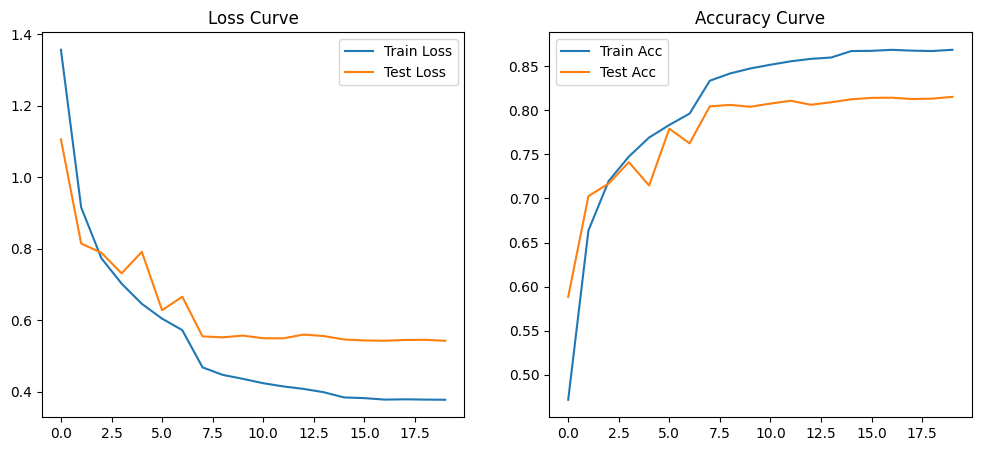

In [22]:
#Data augmentaion + optimse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=8, negative_slope=0.01):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 7 * 7, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, num_classes)
        self.negative_slope = negative_slope

    def forward(self, x):
        x = self.pool(F.leaky_relu(self.conv1(x), negative_slope=self.negative_slope))
        x = self.pool(F.leaky_relu(self.conv2(x), negative_slope=self.negative_slope))
        x = self.pool(F.leaky_relu(self.conv3(x), negative_slope=self.negative_slope))
        x = x.view(x.size(0), -1)
        x = F.leaky_relu(self.fc1(x), negative_slope=self.negative_slope)
        x = F.leaky_relu(self.fc2(x), negative_slope=self.negative_slope)
        x = self.fc3(x)
        return x

train_dir = './data/train'
test_dir = './data/test'
batch_size = 64
num_epochs = 20
num_classes = 8
lr=0.001
save_path='best_simplecnnbatch2DdataaugmentOptimisers.pth'

train_loader, test_loader = get_data_loaders_data_arg(train_dir, test_dir, batch_size=batch_size)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleCNN(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
best_acc = 0.0
history = {'train_loss': [], 'train_acc': [], 'test_loss': [], 'test_acc': []}

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    train_loss, train_acc = train_one_epoch(model, optimizer, criterion, train_loader, device)
    test_loss, test_acc = evaluate(model, criterion, test_loader, device)
    print(f"Train Loss: {train_loss:.4f}  Acc: {train_acc:.4f}")
    print(f"Test  Loss: {test_loss:.4f}  Acc: {test_acc:.4f}")

    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['test_loss'].append(test_loss)
    history['test_acc'].append(test_acc)

    if test_acc > best_acc:
        best_acc = test_acc
        torch.save(model.state_dict(), save_path)
        print("Best model saved.")
    scheduler.step()
print(f"Best Test Accuracy: {best_acc:.4f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['test_loss'], label='Test Loss')
plt.legend()
plt.title('Loss Curve')
plt.subplot(1,2,2)
plt.plot(history['train_acc'], label='Train Acc')
plt.plot(history['test_acc'], label='Test Acc')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

/tmp/ipykernel_28260/2127217084.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_simplecnnbatch2DdataaugmentOptimisers.pth', map_lo

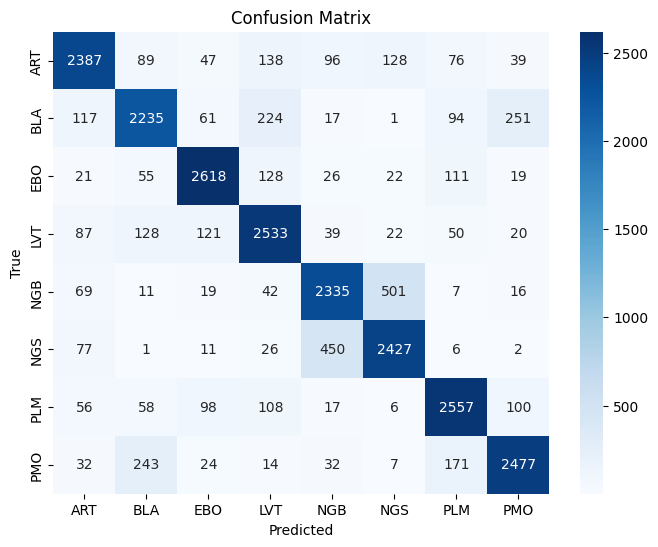


Classification Report:

              precision    recall  f1-score   support

         ART       0.84      0.80      0.82      3000
         BLA       0.79      0.74      0.77      3000
         EBO       0.87      0.87      0.87      3000
         LVT       0.79      0.84      0.82      3000
         NGB       0.78      0.78      0.78      3000
         NGS       0.78      0.81      0.79      3000
         PLM       0.83      0.85      0.84      3000
         PMO       0.85      0.83      0.84      3000

    accuracy                           0.82     24000
   macro avg       0.82      0.82      0.82     24000
weighted avg       0.82      0.82      0.82     24000



In [23]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleCNN(num_classes=8).to(device)
model.load_state_dict(torch.load('best_simplecnnbatch2DdataaugmentOptimisers.pth', map_location=device))
class_names = ['ART', 'BLA', 'EBO', 'LVT', 'NGB', 'NGS', 'PLM', 'PMO']
plot_confusion_matrix(model, test_loader, device, class_names)

1.3 Choose a subset of test images and visualise (e.g., with a border) which ones were
classified correctly and which one weren’t. Explain why you think they were classified
this way.


Visualizing classifications on test set...


/tmp/ipykernel_28260/2318609023.py:122: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(save_path))


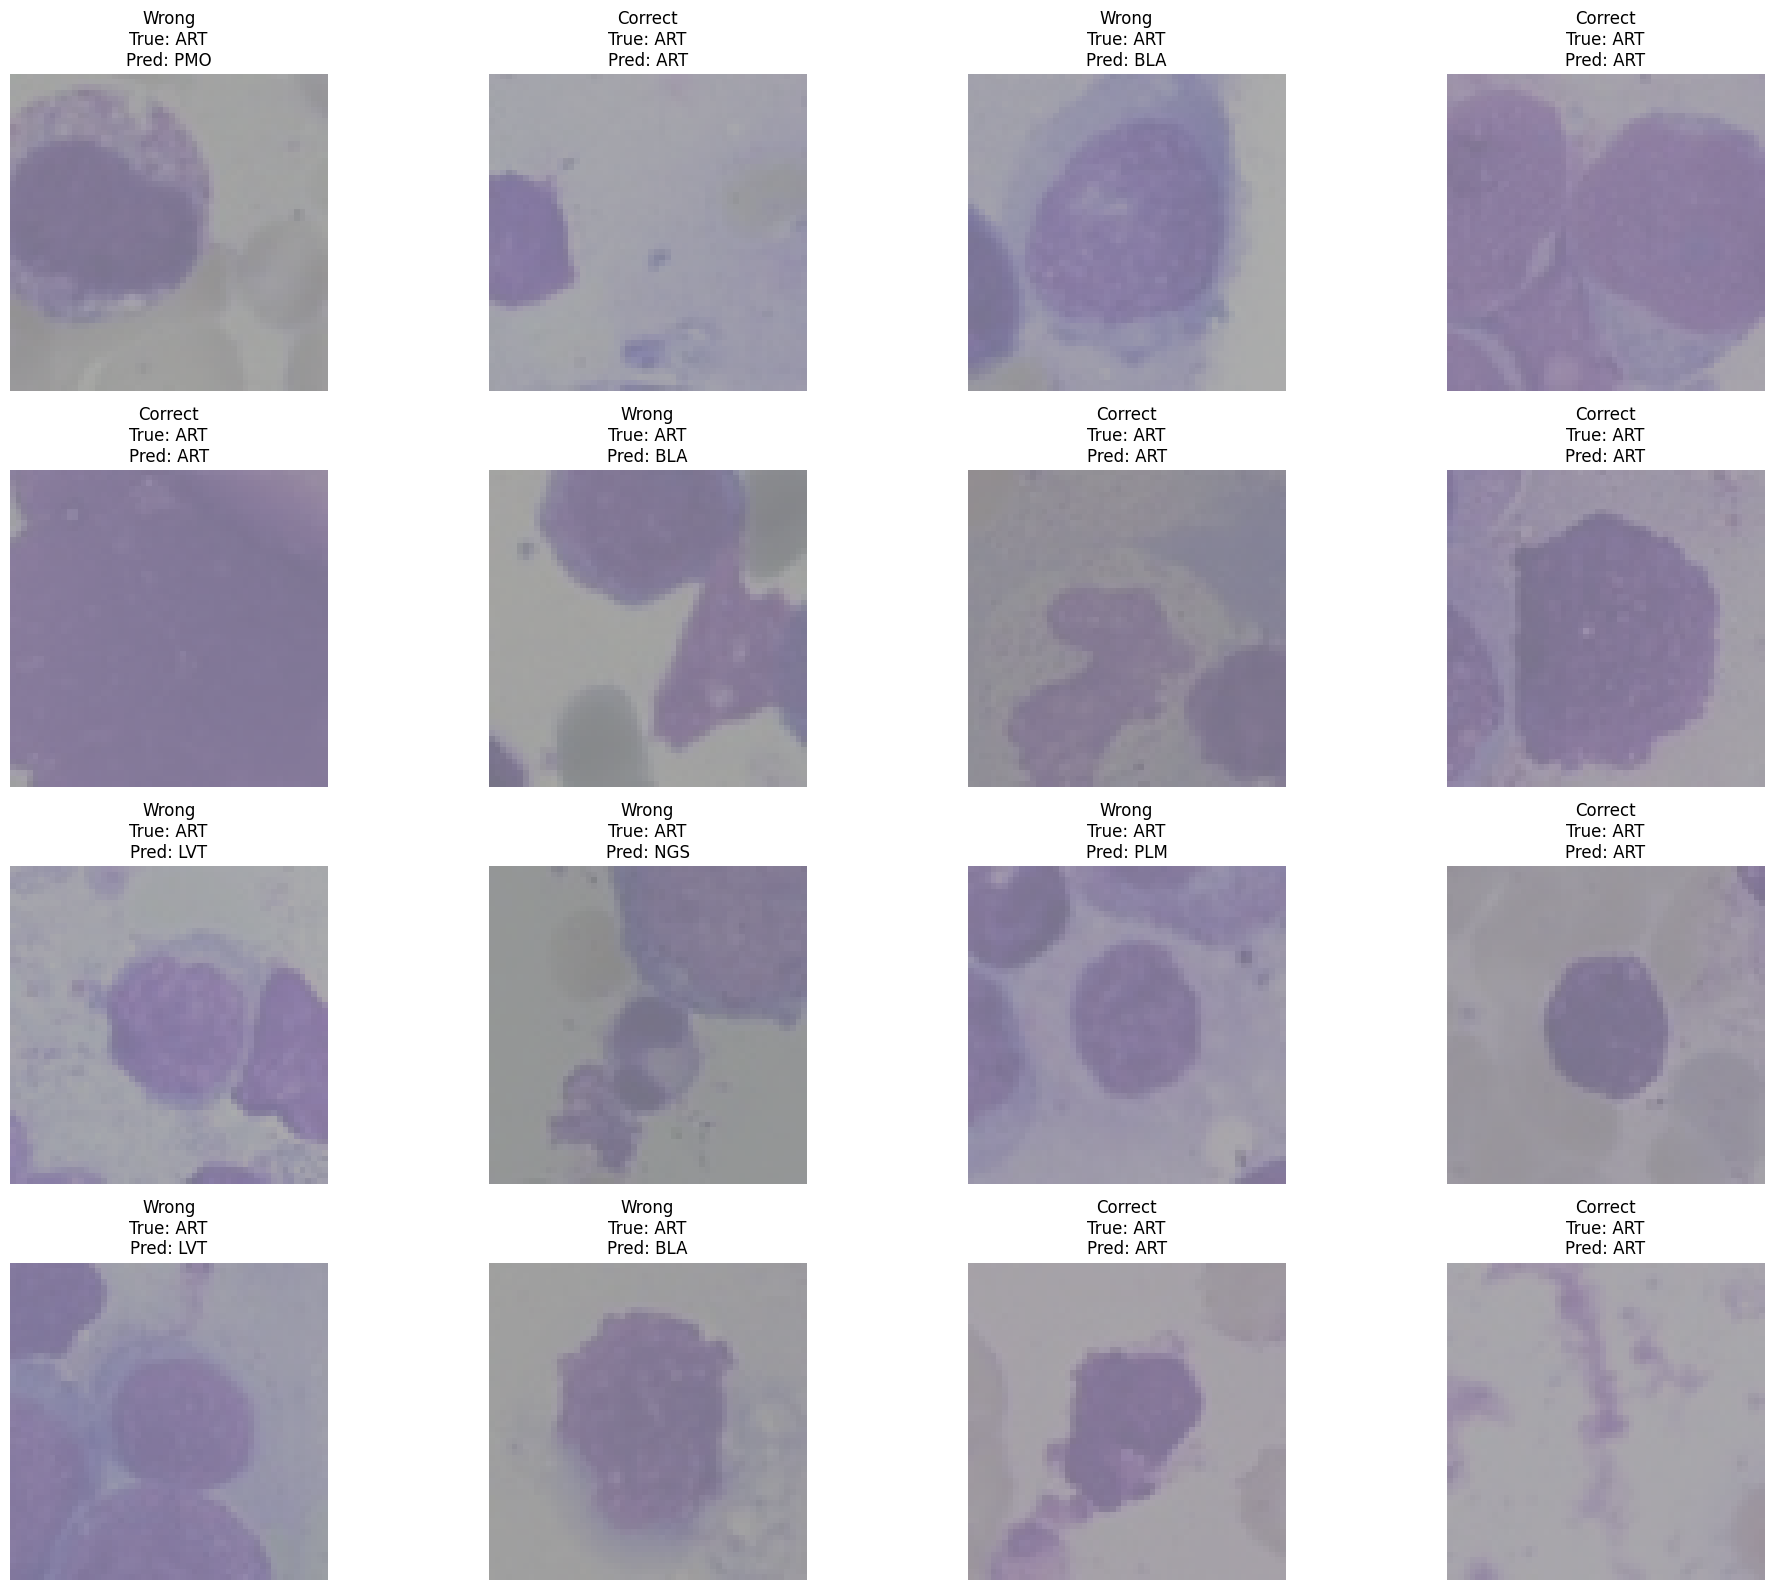


Analysis of Misclassifications:
Image misclassified as NGB instead of ART
Image misclassified as BLA instead of ART
Image misclassified as LVT instead of ART
Image misclassified as LVT instead of ART
Image misclassified as NGS instead of ART

Possible reasons for misclassifications:
1. Visual similarities between certain room types (e.g., living room vs dining room)
2. Ambiguous viewpoints or partial room views
3. Shared furniture or objects between different room types
4. Lighting conditions affecting feature recognition
5. Uncommon room layouts or decorations that differ from training examples


In [25]:
import matplotlib.pyplot as plt
import numpy as np
import random
import torch
from torchvision.utils import make_grid

def visualize_classifications(model, test_loader, device, num_images=16, class_names=None):

    if class_names is None:
        class_names = ['ART', 'BLA', 'EBO', 'LVT', 'NGB', 'NGS', 'PLM', 'PMO']

    model.eval()

    all_images = []
    all_labels = []
    all_preds = []
    
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            
            all_images.append(images.cpu())
            all_labels.append(labels.cpu())
            all_preds.append(preds.cpu())
            
            if len(torch.cat(all_images)) >= num_images * 3:  
                break
    
    all_images = torch.cat(all_images)
    all_labels = torch.cat(all_labels)
    all_preds = torch.cat(all_preds)

    correct_mask = all_labels == all_preds
    correct_indices = torch.where(correct_mask)[0].tolist()
    incorrect_indices = torch.where(~correct_mask)[0].tolist()

    num_correct = min(num_images // 2, len(correct_indices))
    num_incorrect = min(num_images - num_correct, len(incorrect_indices))
    
    selected_correct = random.sample(correct_indices, num_correct)
    selected_incorrect = random.sample(incorrect_indices, num_incorrect)
    
    selected_indices = selected_correct + selected_incorrect
    random.shuffle(selected_indices) 
    plt.figure(figsize=(20, 16))
    
    for i, idx in enumerate(selected_indices[:num_images]):
        img = all_images[idx]
        label = all_labels[idx].item()
        pred = all_preds[idx].item()

        plt.subplot(4, 4, i + 1)

        img = img.permute(1, 2, 0).numpy()
        img = np.clip(img * 0.225 + 0.45, 0, 1)  
        if label == pred:
            plt.imshow(img)
            plt.gca().spines['bottom'].set_color('green')
            plt.gca().spines['top'].set_color('green') 
            plt.gca().spines['right'].set_color('green')
            plt.gca().spines['left'].set_color('green')
            plt.gca().spines['bottom'].set_linewidth(5)
            plt.gca().spines['top'].set_linewidth(5) 
            plt.gca().spines['right'].set_linewidth(5)
            plt.gca().spines['left'].set_linewidth(5)
            result = "Correct"
        else:
            plt.imshow(img)
            plt.gca().spines['bottom'].set_color('red')
            plt.gca().spines['top'].set_color('red') 
            plt.gca().spines['right'].set_color('red')
            plt.gca().spines['left'].set_color('red')
            plt.gca().spines['bottom'].set_linewidth(5)
            plt.gca().spines['top'].set_linewidth(5) 
            plt.gca().spines['right'].set_linewidth(5)
            plt.gca().spines['left'].set_linewidth(5)
            result = "Wrong"

        plt.title(f"{result}\nTrue: {class_names[label]}\nPred: {class_names[pred]}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.savefig('classification_visualization.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\nAnalysis of Misclassifications:")
    misclassified = [(i, all_labels[i].item(), all_preds[i].item()) for i in incorrect_indices[:min(5, len(incorrect_indices))]]
    
    for idx, true_label, pred_label in misclassified:
        print(f"Image misclassified as {class_names[pred_label]} instead of {class_names[true_label]}")
    

model.load_state_dict(torch.load(save_path))
visualize_classifications(model, test_loader, device, num_images=16)


2. Advanced Part

/tmp/ipykernel_108155/2355708356.py:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_simplecnnbatch2DdataaugmentOptimisers1.pth', map

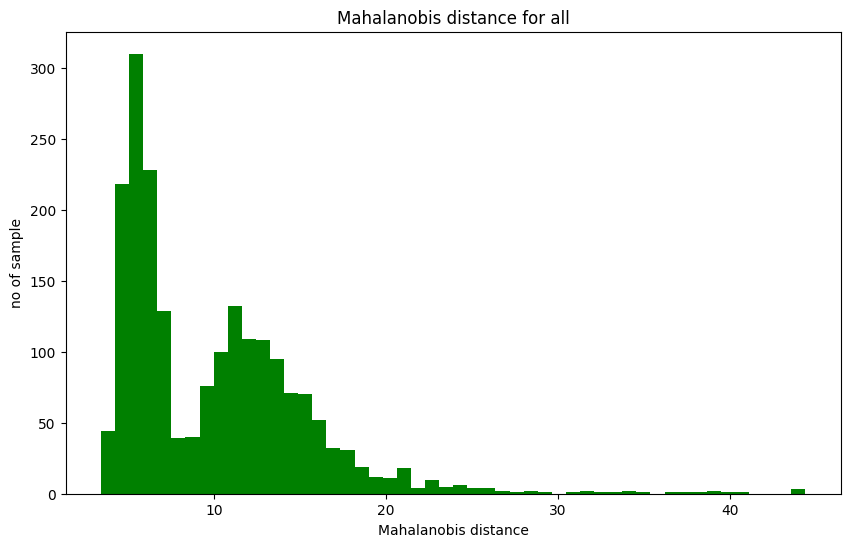

In [2]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import mahalanobis
from sklearn.covariance import EmpiricalCovariance

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=8, negative_slope=0.01):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 7 * 7, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, num_classes)
        self.negative_slope = negative_slope

    def forward(self, x):
        x = self.pool(F.leaky_relu(self.bn1(self.conv1(x)), negative_slope=self.negative_slope))
        x = self.pool(F.leaky_relu(self.bn2(self.conv2(x)), negative_slope=self.negative_slope))
        x = self.pool(F.leaky_relu(self.bn3(self.conv3(x)), negative_slope=self.negative_slope))
        x = x.view(x.size(0), -1)
        x = F.leaky_relu(self.fc1(x), negative_slope=self.negative_slope)
        x = F.leaky_relu(self.fc2(x), negative_slope=self.negative_slope)
        x = self.fc3(x)
        return x
    
    def get_penultimate_features(self, x):
        x = self.pool(F.leaky_relu(self.bn1(self.conv1(x)), negative_slope=self.negative_slope))
        x = self.pool(F.leaky_relu(self.bn2(self.conv2(x)), negative_slope=self.negative_slope))
        x = self.pool(F.leaky_relu(self.bn3(self.conv3(x)), negative_slope=self.negative_slope))
        x = x.view(x.size(0), -1)
        x = F.leaky_relu(self.fc1(x), negative_slope=self.negative_slope)
        features = F.leaky_relu(self.fc2(x), negative_slope=self.negative_slope)
        return features

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


num_classes = 8
model = SimpleCNN(num_classes=num_classes).to(device)
model.load_state_dict(torch.load('best_simplecnnbatch2DdataaugmentOptimisers1.pth', map_location=device))
model.eval()

transform = transforms.Compose([
    transforms.Resize((56, 56)),
    transforms.ToTensor()
])

all_dataset = datasets.ImageFolder('./id_odd_samples', transform=transform)
all_loader = DataLoader(all_dataset, batch_size=64, shuffle=False)


all_features = []


with torch.no_grad():
    for images, _ in all_loader:
        images = images.to(device)
        features = model.get_penultimate_features(images)
        all_features.extend(features.cpu().numpy())

all_features = np.array(all_features)


mean_vec = np.mean(all_features, axis=0)

cov = EmpiricalCovariance().fit(all_features)
inv_cov = cov.precision_

m_distances = []
for feat in all_features:
    dist = mahalanobis(feat, mean_vec, inv_cov)
    m_distances.append(dist)

m_distances = np.array(m_distances)

plt.figure(figsize=(10, 6))
plt.hist(m_distances, bins=50, color='green')
plt.xlabel('Mahalanobis distance')
plt.ylabel('no of sample')
plt.title('Mahalanobis distance for all')
plt.savefig('all_mahalanobis_distances.png')
plt.show()



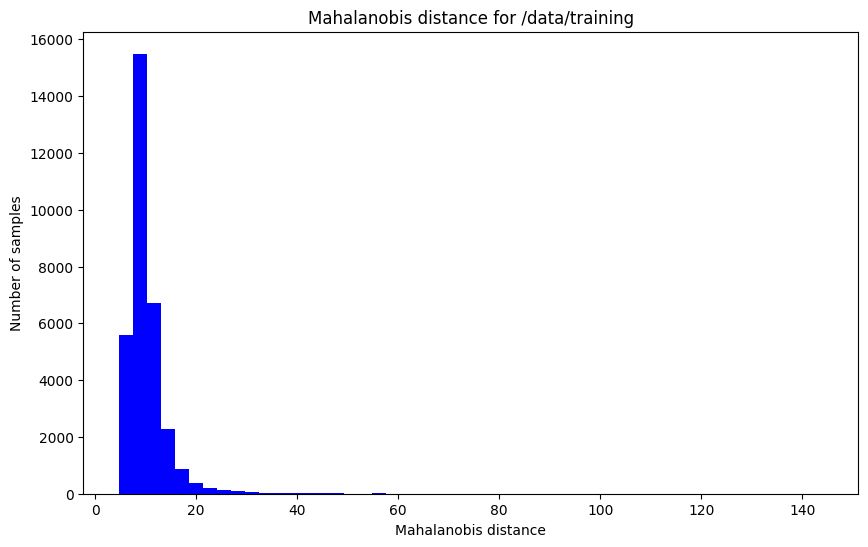

In [3]:

training_dataset = datasets.ImageFolder('./data/train', transform=transform)
training_loader = DataLoader(training_dataset, batch_size=64, shuffle=False)

training_features = []
with torch.no_grad():
    for images, _ in training_loader:
        images = images.to(device)
        features = model.get_penultimate_features(images)
        training_features.extend(features.cpu().numpy())

training_features = np.array(training_features)

training_mean_vec = np.mean(training_features, axis=0)

training_cov = EmpiricalCovariance().fit(training_features)
training_inv_cov = training_cov.precision_


training_m_distances = []
for feat in training_features:
    dist = mahalanobis(feat, training_mean_vec, training_inv_cov)
    training_m_distances.append(dist)

training_m_distances = np.array(training_m_distances)

plt.figure(figsize=(10, 6))
plt.hist(training_m_distances, bins=50, color='blue')
plt.xlabel('Mahalanobis distance')
plt.ylabel('Number of samples')
plt.title('Mahalanobis distance for /data/training')
plt.savefig('training_mahalanobis_distances.png')
plt.show()
